# Ribosomal Protein Analysis 

# Summary

General idea behind this project is to study the evolution of the ribosome on the structural level to better understand the rapid adaptive evolution that splits the 2 main lineages of life: Bacteria and Archea.


Project plan:
1. Construct a table of organisms (RefSeq; Bacteria, Archaea, Eucaryotes) by ribosomal protein - mark what is known, outline appropriate IDs (UniProt, RefSeq, PDB) and data
2. Analyse outcomes to  pick the best ribosomal proteins for in-depth structural studies (computational and molecular) in terms of evolution



Table of notebook contents:
1. Summary 
2. Dependencies
3. STEP 1: Protein data input
4. STEP 2: DataFrame construction
5. STEP 3: DataFrame statistics
6. STEP 4: Creating a boxplot of protein lengths
7. STEP 5: SIFTS to obtain 3D Structure data
8. STEP 6: Merging ribosome_proteins and uniprot_pdb_map
9. STEP 7: PDB Proteins characteristics
10. STEP 8: Multiple 3D structure records selection
11. STEP 9: Final selection 


# Dependencies 

Necessary tools and packages to prepare:

In [1]:
import pandas as pd
import pickle
import requests
import io
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import json

In [2]:
%matplotlib inline

# STEP 1: Protein data input

Below is the list of all query proteins we want to find in UniProt and retrieve to later put into our dataframe.
Proteins selection is based on Phylosift Reference Marker Genes: https://phylosift.wordpress.com/tutorials/scripts-markers/

Queries list is a list of appropriate entry names in UniProt.

In [3]:
queries = ['l5-rple',
           'l11-rplk',
           's2-rpsb',
           'rps2-rpsb',
           'rp-s10',
           'l1-rpla',
           'rp-l22',
           'l4 l1e',
           'l2-rplb',
           'rp-s9',
           'l3-rplc',
           'l14b-l23e',
           's5',
           's19-rpss',
           's7-rpsg',
           'l16 l10e',
           's13-rpsm',
           'rpl15',
           'l23-rplw',
           'l6-rplf',
           'l11-rplk',
           's12 s23',
           'rpl29',
           's3 rpsc',
           's11 rpsk',
           'rpl10',
           'rps8',
           'l18 l5e',
           's15p s13e',
           'rps17',
           'rpl13',
           'rpl24',
           'l5-rple']
results = {}

Query is sent to UniProt using RestAPI Services and requests package

In [4]:
for _query in queries:
    baseURL = ('https://www.uniprot.org/uniprot/')
    payload = {'query': 'name:"%s"+name:"ribosomal"' % (_query),
               'format': 'tab',
              'columns': 'id,entry_name,organism,protein_names,citation,families,lineage-id(all),length,lineage(KINGDOM)'}
    result = requests.get(baseURL, params=payload)
    if result.ok:
        print ('%s OK!' % (_query))
    else: print ('Something went wrong', result.status_code)
    results[_query] = result

l5-rple OK!
l11-rplk OK!
s2-rpsb OK!
rps2-rpsb OK!
rp-s10 OK!
l1-rpla OK!
rp-l22 OK!
l4 l1e OK!
l2-rplb OK!
rp-s9 OK!
l3-rplc OK!
l14b-l23e OK!
s5 OK!
s19-rpss OK!
s7-rpsg OK!
l16 l10e OK!
s13-rpsm OK!
rpl15 OK!
l23-rplw OK!
l6-rplf OK!
l11-rplk OK!
s12 s23 OK!
rpl29 OK!
s3 rpsc OK!
s11 rpsk OK!
rpl10 OK!
rps8 OK!
l18 l5e OK!
s15p s13e OK!
rps17 OK!
rpl13 OK!
rpl24 OK!
l5-rple OK!


The outcome we have is 'results'.
Saving `results` as a pickle:

In [5]:
fh = open('results.uniprot', 'wb')
pickle.dump(results, fh)
fh.close()

Loading `results` pickle:

In [6]:
results = pickle.load(open('results.uniprot', 'rb'))

Enumerating queries and parsing `results` to load them into a `pd.DataFrame`

In [6]:
for i, query in enumerate(queries):
    print(i, query)

0 l5-rple
1 l11-rplk
2 s2-rpsb
3 rps2-rpsb
4 rp-s10
5 l1-rpla
6 rp-l22
7 l4 l1e
8 l2-rplb
9 rp-s9
10 l3-rplc
11 l14b-l23e
12 s5
13 s19-rpss
14 s7-rpsg
15 l16 l10e
16 s13-rpsm
17 rpl15
18 l23-rplw
19 l6-rplf
20 l11-rplk
21 s12 s23
22 rpl29
23 s3 rpsc
24 s11 rpsk
25 rpl10
26 rps8
27 l18 l5e
28 s15p s13e
29 rps17
30 rpl13
31 rpl24
32 l5-rple


In [7]:
# allocate an empty list of length = number of queries
_df = [None] * len(queries)

# loop over all queries and store the number of loop iteration as a variable `i`
for i, query in enumerate(queries):
    try:
        # `io.StringIO` makes a str look like a file, so that we can read it into pandas - format conversion
        _df[i] = pd.read_csv(io.StringIO(results[query].text), sep='\t')
        _df[i]['ribosome protein'] = query
    except pd.errors.EmptyDataError:
        print('%s nie sciagnelo sie dobrze' % query)     

rps2-rpsb nie sciagnelo sie dobrze
rp-l22 nie sciagnelo sie dobrze
s11 rpsk nie sciagnelo sie dobrze
l18 l5e nie sciagnelo sie dobrze


# STEP 2: DataFrame construction

Merge per-query DataFrames into a single DataFrame with Pandas.concat function. The DataFrame is defined as `ribosome_proteins` and will be referred later on accordingly.

In [8]:
ribosome_proteins = pd.concat(_df)

Describing a query criteria and filters for the DataFrame

In [9]:
ribosome_proteins[ (ribosome_proteins['Length'] < 200)]

,Entry,Entry name,Organism,Protein names,PubMed ID,Protein families,Taxonomic lineage IDs (all),Length,Taxonomic lineage (KINGDOM),ribosome protein
0,A0A075I9M5,A0A075I9M5_9ARCH,uncultured marine thaumarchaeote SAT1000_31_A02,"Ribosomal protein L5P (RP-L5, rplE)",2.49233e+07,Universal ribosomal protein uL5 family,"131567, 2157, 1783275, 651137, 651140, 1456404",165,NaN,l5-rple
1,A0A075IB71,A0A075IB71_9ARCH,uncultured marine thaumarchaeote SAT1000_22_C02,"Ribosomal protein L5P (RP-L5, rplE)",2.49233e+07,Universal ribosomal protein uL5 family,"131567, 2157, 1783275, 651137, 651140, 1456394",173,NaN,l5-rple
2,A0A075HPI5,A0A075HPI5_9ARCH,uncultured marine thaumarchaeote KM3_76_D06,"Ribosomal protein L5P (RP-L5, rplE)",2.49233e+07,Universal ribosomal protein uL5 family,"131567, 2157, 1783275, 651137, 651140, 1456284",153,NaN,l5-rple
3,A0A075FPU4,A0A075FPU4_9ARCH,uncultured marine thaumarchaeote AD1000_33_G09,"Ribosomal protein L5P (RP-L5, rplE)",2.49233e+07,Universal ribosomal protein uL5 family,"131567, 2157, 1783275, 651137, 651140, 1455909",170,NaN,l5-rple
4,A0A075HF78,A0A075HF78_9ARCH,uncultured marine thaumarchaeote KM3_69_H10,"Ribosomal protein L5P (RP-L5, rplE)",2.49233e+07,Universal ribosomal protein uL5 family,"131567, 2157, 1783275, 651137, 651140, 1456245",173,NaN,l5-rple
...,...,...,...,...,...,...,...,...,...,...
7,A0A075HI95,A0A075HI95_9ARCH,uncultured marine thaumarchaeote KM3_71_C08,"Ribosomal protein L5P (RP-L5, rplE)",2.49233e+07,Universal ribosomal protein uL5 family,"131567, 2157, 1783275, 651137, 651140, 1456257",173,NaN,l5-rple
8,A0A075FN88,A0A075FN88_9EURY,uncultured marine group II/III euryarchaeote A...,"Ribosomal protein L5 (RP-L5, rplE)",2.49233e+07,Universal ribosomal protein uL5 family,"131567, 2157, 28890, 68359, 1457711",175,NaN,l5-rple
9,A0A075GC27,A0A075GC27_9EURY,uncultured marine group II/III euryarchaeote K...,"Ribosomal protein L5 (RP-L5, rplE)",2.49233e+07,Universal ribosomal protein uL5 family,"131567, 2157, 28890, 68359, 1457879",168,NaN,l5-rple
10,A0A655FNP4,A0A655FNP4_MYCTX,Mycobacterium tuberculosis,"50S ribosomal protein L5, RplE",NaN,Universal ribosomal protein uL5 family,"131567, 2, 1783272, 201174, 1760, 85007, 1762,...",124,NaN,l5-rple


# STEP 3: DataFrame Statistics

To analyse constructed dataframe and develop statistical description, we can use Python built-in functions such as mean,  std or counts. Append method is used to add and apply statistical function to our already created `ribosome_proteins` dataframe.

In [10]:
means = []
stds = []
counts = []
for query in queries:
    means.append(ribosome_proteins[(ribosome_proteins['ribosome protein'] == query)]['Length'].mean())
    stds.append(ribosome_proteins[(ribosome_proteins['ribosome protein'] == query)]['Length'].std())
    counts.append(len(ribosome_proteins[(ribosome_proteins['ribosome protein'] == query)]))

After applying statistical functions, we summarize the output in a table

In [11]:
pd.DataFrame({'query': queries, 'mean': means, 'std dev': stds, 'count': counts})

,query,mean,std dev,count
0,l5-rple,166.000000,14.191240,24
1,l11-rplk,92.000000,0.000000,6
2,s2-rpsb,168.750000,48.774295,12
3,rps2-rpsb,NaN,NaN,0
4,rp-s10,93.500000,16.263456,2
5,l1-rpla,96.000000,8.485281,2
6,rp-l22,NaN,NaN,0
7,l4 l1e,283.652632,98.147064,95
8,l2-rplb,215.857143,61.866600,7
9,rp-s9,145.500000,5.196152,4


# STEP 4: Creating a Boxplot that shows protein lengths 

To visualise data from `ribosome_proteins` DataFrame and compare lengths, we can create a boxplot. Thanks to that, it is possible to check if there are any outstanding variations and if so, identify them easily. To create a plot, seaborn package is used.

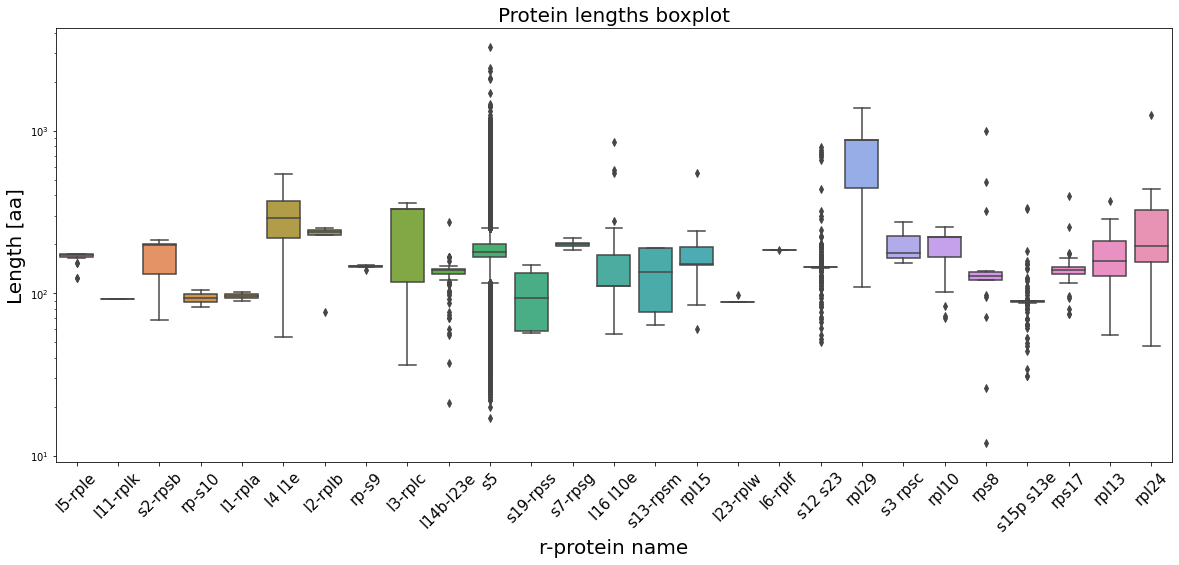

In [12]:
# length boxplot of each protein
# boxplot(x="day", y="total_bill", data=tips)
plt.figure(figsize=(20, 8))
plt.xticks(rotation=45, size=15)
# font size for X i Y

#logarithmic scale
plt.yscale("log")
p = seaborn.boxplot(data=ribosome_proteins, y='Length', x='ribosome protein')
p.axes.set_title("Protein lengths boxplot", fontsize=20)
p.set_xlabel("r-protein name", fontsize=20)
p.set_ylabel('Length [aa]', fontsize=20)
plt.show()

In [13]:
len(ribosome_proteins['ribosome protein'].unique())

27

# STEP 5: SIFTS to obtain 3D structure data

In this step, we are downloading 3D Structure data of analyzed proteins using SIFTS. 
The Structure Integration with Function, Taxonomy and Sequences resource (SIFTS; http://pdbe.org/sifts) is a collaboration between the Protein Data Bank in Europe (PDBe) and UniProt database and other biological resources. Downloading SIFTS in order to get a cross-reference between the PDB and entries present in UniProt. 

The first function used is GNU Wget, which is a free utility for non-interactive download of files from the Web. It supports HTTP, HTTPS, and FTP protocols, as well as retrieval through HTTP proxies.

In [14]:
!wget ftp://ftp.ebi.ac.uk/pub/databases/msd/sifts/flatfiles/tsv/uniprot_pdb.tsv.gz

--2021-01-28 12:43:26--  ftp://ftp.ebi.ac.uk/pub/databases/msd/sifts/flatfiles/tsv/uniprot_pdb.tsv.gz
           => ‘uniprot_pdb.tsv.gz’
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.138|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/databases/msd/sifts/flatfiles/tsv ... done.
==> SIZE uniprot_pdb.tsv.gz ... 784339
==> PASV ... done.    ==> RETR uniprot_pdb.tsv.gz ... done.
Length: 784339 (766K) (unauthoritative)

uniprot_pdb.tsv.gz  100%[===================>] 765.96K   724KB/s    in 1.1s    

2021-01-28 12:43:28 (724 KB/s) - ‘uniprot_pdb.tsv.gz’ saved [784339]



After we obtained 3D protein structure data, another dataframe is created to gather downloaded content. It is defined as `uniprot_pdb_map` and is a direct conversion from tsv file using Pandas.read function

In [16]:
!gunzip uniprot_pdb.tsv.gz

In [17]:
uniprot_pdb_map = pd.read_csv('uniprot_pdb.tsv', sep="\t", comment='#')

In [18]:
uniprot_pdb_map

,SP_PRIMARY,PDB
0,A0A003,6kvc
1,A0A009QSN8,6v39;6v3a;6v3b;6v3d
2,A0A010,5b00;5b01;5b02;5b03;5b0i;5b0j;5b0k;5b0l;5b0m;5...
3,A0A011,3vk5;3vka;3vkb;3vkc;3vkd
4,A0A014C6J9,6br7
...,...,...
53429,X5KVH4,6mfk
53430,X6Q997,6lk2;6lla
53431,X7XZL2,6q09;6tyj;6u3l
53432,X7YCN8,5vba


In [19]:
ribosome_proteins.columns

Index(['Entry', 'Entry name', 'Organism', 'Protein names', 'PubMed ID',
       'Protein families', 'Taxonomic lineage IDs (all)', 'Length',
       'Taxonomic lineage (KINGDOM)', 'ribosome protein'],
      dtype='object')

In [20]:
uniprot_pdb_map.columns

Index(['SP_PRIMARY', 'PDB'], dtype='object')

# STEP 6: Merging ribosome_proteins and uniprot_pdb_map

Merge allows us to compare two dataframes and match appropriate rows with each other to identify proteins with 3D structures so in this step we are combining two existing dataframes we have: `ribosome_proteins` and `uniprot_pdb_map` using Pandas.merge tool

In [21]:
pdb_merge = pd.merge(ribosome_proteins, uniprot_pdb_map, left_on='Entry', right_on='SP_PRIMARY', how="left")

In [22]:
pdb_merge.head()

,Entry,Entry name,Organism,Protein names,PubMed ID,Protein families,Taxonomic lineage IDs (all),Length,Taxonomic lineage (KINGDOM),ribosome protein,SP_PRIMARY,PDB
0,A0A075I9M5,A0A075I9M5_9ARCH,uncultured marine thaumarchaeote SAT1000_31_A02,"Ribosomal protein L5P (RP-L5, rplE)",2.49233e+07,Universal ribosomal protein uL5 family,"131567, 2157, 1783275, 651137, 651140, 1456404",165,NaN,l5-rple,NaN,NaN
1,A0A075IB71,A0A075IB71_9ARCH,uncultured marine thaumarchaeote SAT1000_22_C02,"Ribosomal protein L5P (RP-L5, rplE)",2.49233e+07,Universal ribosomal protein uL5 family,"131567, 2157, 1783275, 651137, 651140, 1456394",173,NaN,l5-rple,NaN,NaN
2,A0A075HPI5,A0A075HPI5_9ARCH,uncultured marine thaumarchaeote KM3_76_D06,"Ribosomal protein L5P (RP-L5, rplE)",2.49233e+07,Universal ribosomal protein uL5 family,"131567, 2157, 1783275, 651137, 651140, 1456284",153,NaN,l5-rple,NaN,NaN
3,A0A075FPU4,A0A075FPU4_9ARCH,uncultured marine thaumarchaeote AD1000_33_G09,"Ribosomal protein L5P (RP-L5, rplE)",2.49233e+07,Universal ribosomal protein uL5 family,"131567, 2157, 1783275, 651137, 651140, 1455909",170,NaN,l5-rple,NaN,NaN
4,A0A075HF78,A0A075HF78_9ARCH,uncultured marine thaumarchaeote KM3_69_H10,"Ribosomal protein L5P (RP-L5, rplE)",2.49233e+07,Universal ribosomal protein uL5 family,"131567, 2157, 1783275, 651137, 651140, 1456245",173,NaN,l5-rple,NaN,NaN


List of ribosome proteins from ribosome_proteins DataFrame that have 3D structures in PDB

# STEP 7: PDB proteins characteristics

Developing DataFrame with characteristics of the selected 3D structure proteins for further analysis. This dataframe is described as `pdb_subset` and is later referred as such

In [56]:
pdb_subset = pdb_merge.dropna(subset=['PDB']).reset_index(drop=True)
pdb_subset[['Entry',
           'ribosome protein',
           'PDB']]

,Entry,ribosome protein,PDB
0,P0A7W2,s5,4v48
1,P27152,s5,6c5l
2,P02357,s5,1dv4;1pkp;1qd7
3,A2RNN6,s5,5myj
4,P19954,s5,5mmj;5mmm;5x8p;5x8r;6eri
...,...,...,...
63,A0A045JKV0,s5,5v93
64,C3SR27,s5,6ysr;6yss;6yst;6ysu
65,A0A6A5PUZ5,rpl10,6xiq;6xir
66,E6PBT5,rps17,4bts


In [57]:
pdb_merge.shape

(52781, 12)

In [25]:
pdb_singletons = pdb_merge[pdb_merge['PDB'].str.split(';').str.len()==1]

By filtering `pdb_subset` we can display names of organisms that a protein, with known PDB structure, originates from

In [26]:
pdb_subset[['Organism']]

,Organism
0,Escherichia coli O6:H1 (strain CFT073 / ATCC 7...
1,Thermus thermophilus
2,Geobacillus stearothermophilus (Bacillus stear...
3,Lactococcus lactis subsp. cremoris (strain MG1...
4,Spinacia oleracea (Spinach)
...,...
63,Mycobacterium tuberculosis
64,Escherichia coli
65,Saccharomyces cerevisiae (Baker's yeast)
66,Tetrahymena thermophila


In [27]:
list_of_organisms = pdb_subset['Organism'].unique()
print('List of Organisms: ', list_of_organisms)
print('Type of listOfOrganisms: ', type(list_of_organisms))

List of Organisms:  ['Escherichia coli O6:H1 (strain CFT073 / ATCC 700928 / UPEC)'
 'Thermus thermophilus'
 'Geobacillus stearothermophilus (Bacillus stearothermophilus)'
 'Lactococcus lactis subsp. cremoris (strain MG1363)'
 'Spinacia oleracea (Spinach)' 'Escherichia coli O157:H7'
 'Thermus thermophilus (strain HB8 / ATCC 27634 / DSM 579)'
 'Bos taurus (Bovine)' 'Bacillus subtilis (strain 168)'
 'Thermus thermophilus (strain HB27 / ATCC BAA-163 / DSM 7039)'
 'Drosophila melanogaster (Fruit fly)'
 'Acinetobacter baumannii (strain AB0057)'
 'Thermococcus kodakarensis (strain ATCC BAA-918 / JCM 12380 / KOD1) (Pyrococcus kodakaraensis (strain KOD1))'
 'Homo sapiens (Human)'
 'Staphylococcus aureus (strain bovine RF122 / ET3-1)'
 'Escherichia coli (strain K12)'
 'Staphylococcus aureus (strain NCTC 8325 / PS 47)'
 'Neurospora crassa (strain ATCC 24698 / 74-OR23-1A / CBS 708.71 / DSM 1257 / FGSC 987)'
 "Saccharomyces cerevisiae (strain ATCC 204508 / S288c) (Baker's yeast)"
 'Pyrococcus abyss

Other filtering can be also performed. Below we display entry names of proteins that have 3D structures

In [28]:
list_of_proteins = pdb_subset['ribosome protein'].to_list()
print('List of Proteins: ', list_of_proteins)
print('Type of listOfProteins: ', type(list_of_proteins))

List of Proteins:  ['s5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 'rpl10', 'rps17', 'rpl24']
Type of listOfProteins:  <class 'list'>


In [29]:
name_count = list_of_proteins.count('s5')
name_count1 = list_of_proteins.count('rps17')
print('The count of protein: s5 is ', name_count)
print('The count of protein: rps17 is ', name_count1)

The count of protein: s5 is  65
The count of protein: rps17 is  1


In [30]:
v = pdb_subset.PDB.value_counts()
v

6ywe;6ywy                                                                                                                                                                                                                                                                                                                                                                                                                                                            2
3j7a;3jbn;3jbo;3jbp;6okk                                                                                                                                                                                                                                                                                                                                                                                                                                             2
6xiq;6xir                                                                                 

Below we filter `pdb_subset` frame to view only proteins with more than one PDB value in 'PDB' column 

In [54]:
pdb_subset[pdb_subset['PDB'].str.split(';').str.len()>1]

,Entry,Entry name,Organism,Protein names,PubMed ID,Protein families,Taxonomic lineage IDs (all),Length,Taxonomic lineage (KINGDOM),ribosome protein,SP_PRIMARY,PDB
2,P02357,RS5_GEOSE,Geobacillus stearothermophilus (Bacillus stear...,30S ribosomal protein S5 (BS5) (BS6),6363400; 1985969; 4607606; 2254291; 1508272; 9...,Universal ribosomal protein uS5 family,"131567, 2, 1783272, 1239, 91061, 1385, 186817,...",166,NaN,s5,P02357,1dv4;1pkp;1qd7
4,P19954,PRSP1_SPIOL,Spinacia oleracea (Spinach),"Ribosome-binding factor PSRP1, chloroplastic (...",2693942; 2259340; 2376575; 1731992; 24352233; ...,"HPF/YfiA ribosome-associated protein family, L...","131567, 2759, 33090, 35493, 131221, 3193, 5802...",302,Viridiplantae,s5,P19954,5mmj;5mmm;5x8p;5x8r;6eri
5,P0A7W3,RS5_ECO57,Escherichia coli O157:H7,30S ribosomal protein S5,11206551; 11258796,Universal ribosomal protein uS5 family,"131567, 2, 1224, 1236, 91347, 543, 561, 562, 8...",167,NaN,s5,P0A7W3,5wf0;5wfs;6awb;6awc;6awd
6,Q5SHQ5,RS5_THET8,Thermus thermophilus (strain HB8 / ATCC 27634 ...,30S ribosomal protein S5,7957245; 16287167; 10476960; 10588692; 1101418...,Universal ribosomal protein uS5 family,"131567, 2, 1783272, 1297, 188787, 68933, 18878...",162,NaN,s5,Q5SHQ5,1fjg;1fka;1hnw;1hnx;1hnz;1hr0;1i94;1i95;1i96;1...
7,Q2KID9,RT05_BOVIN,Bos taurus (Bovine),"28S ribosomal protein S5, mitochondrial (MRP-S...",11344316; 24799711,Universal ribosomal protein uS5 family,"131567, 2759, 33154, 33208, 6072, 33213, 33511...",430,Metazoa,s5,Q2KID9,3jd5;6neq;6nf8
8,P21467,RS5_BACSU,Bacillus subtilis (strain 168),30S ribosomal protein S5 (BS5),8635744; 2139212; 9384377; 8969501; 6806564; 6...,Universal ribosomal protein uS5 family,"131567, 2, 1783272, 1239, 91061, 1385, 186817,...",166,NaN,s5,P21467,1eg0;3j9w;5njt;6ha1;6ha8;6htq
9,P62665,RS5_THET2,Thermus thermophilus (strain HB27 / ATCC BAA-1...,30S ribosomal protein S5,15064768,Universal ribosomal protein uS5 family,"131567, 2, 1783272, 1297, 188787, 68933, 18878...",162,NaN,s5,P62665,4kvb;4v4i;4v4j;4v63;4v67;4v7p;4v83;4v84;4v9j;4...
11,B7IA22,RS5_ACIB5,Acinetobacter baumannii (strain AB0057),30S ribosomal protein S5,18931120,Universal ribosomal protein uS5 family,"131567, 2, 1224, 1236, 72274, 468, 469, 909768...",165,NaN,s5,B7IA22,6v39;6v3a;6v3b;6v3e
12,Q5JJG8,RS5_THEKO,Thermococcus kodakarensis (strain ATCC BAA-918...,30S ribosomal protein S5,15710748,Universal ribosomal protein uS5 family,"131567, 2157, 28890, 183968, 2258, 2259, 2263,...",235,NaN,s5,Q5JJG8,6skf;6skg;6th6
13,P46782,RS5_HUMAN,Homo sapiens (Human),40S ribosomal protein S5 (Small ribosomal subu...,7772601; 11875025; 14702039; 15489334; 9582194...,Universal ribosomal protein uS7 family,"131567, 2759, 33154, 33208, 6072, 33213, 33511...",204,Metazoa,s5,P46782,4ug0;4v6x;5a2q;5aj0;5flx;5lks;5oa3;5t2c;5vyc;6...


In [55]:
pdb_subset[pdb_subset['PDB'].str.split(';').str.len()>1].shape

(43, 12)

# STEP 8: Multiple 3D structure records selection

After we identified proteins with multiple (more than one) records of their 3D structures available in PDB Database, further selection needs to be performed. The aim of this step is to choose best records among other for each multiple record protein. Criteria can concern attributes as resolution, length or experimental method. To do so, below steps can be followed.

Firstly, we need to download PDB data of multiple records. We obtained: rcsb ID, external references ID, title of structure, resolution and experimental method. All was made using query build with GraphiQL API.
1. [GraphiQL with query system](http://data.rcsb.org/graphql/index.html?query=%7B%0A%20%20entries(entry_ids%3A%20%5B%221PKP%22%2C%20%221VD4%22%5D)%20%7B%0A%20%20%20%20rcsb_id%0A%20%20%20%20rcsb_external_references%20%7B%0A%20%20%20%20%20%20id%0A%20%20%20%20%7D%0A%20%20%20%20struct%20%7B%0A%20%20%20%20%20%20title%0A%20%20%20%20%7D%0A%20%20%20%20em_3d_reconstruction%20%7B%0A%20%20%20%20%20%20resolution%0A%20%20%20%20%7D%0A%20%20%20%20exptl%20%7B%0A%20%20%20%20%20%20method%0A%20%20%20%20%7D%0A%20%20%7D%0A%7D%0A) 
2. [Data attributes](https://data.rcsb.org/data-attributes.html) 



In [181]:
query='''{
  entries(entry_ids: ["4ug0", "4v6x", "4ug0", "4v6x", "5a2q", "5aj0", "5flx", "5lks", "5oa3", "5t2c", "5vyc", "6ek0", "6fec", "6g18", "6g4s", "6g4w", "6g51", "6g53", "6g5h", "6g5i", "6ip5", "6ip6", "6ip8", "6ole", "6olf", "6olg", "6oli", "6olz", "6om0", "6om7", "6qzp", "6y0g", "6y2l", "6y57", "5wf0", "5wfs", "6awb", "6awc", "6awd", "1fjg", "1fka", "1hnw", "1hnx", "1hnz", "1hr0", "1i94", "1i95", "1i96", "1i97", "1ibk", "1ibl", "1ibm", "1j5e", "1jgo", "1jgp", "1jgq", "1ml5", "1n32", "1n33", "1n34", "1n36", "1vvj", "1vy4", "1vy5", "1vy6", "1vy7", "1xmo", "1xmq", "1xnq", "1xnr", "2e5l", "2f4v", "2hhh", "2uu9", "2uua", "2uub", "2uuc", "2uxb", "2uxc", "2uxd", "2vqe", "2vqf", "2zm6", "3oto", "3t1h", "3t1y", "4aqy", "4b3m", "4b3r", "4b3s", "4b3t", "4dr1", "4dr2", "4dr3", "4dr4", "4dr5", "4dr6", "4dr7", "4duy", "4duz", "4dv0", "4dv1", "4dv2", "4dv3", "4dv4", "4dv5", "4dv6", "4dv7", "4gkj", "4gkk", "4ji0", "4ji1", "4ji2", "4ji3", "4ji4", "4ji5", "4ji6", "4ji7", "4ji8", "4jv5", "4jya", "4k0k", "4khp", "4l47", "4l71", "4lel", "4lf4", "4lf5", "4lf6", "4lf7", "4lf8", "4lf9", "4lfa", "4lfb", "4lfc", "4lfz", "4lnt", "4lsk", "4lt8", "4nxm", "4nxn", "4ox9", "4p6f", "4p70", "4tua", "4tub", "4tuc", "4tud", "4tue", "4v42", "4v4p", "4v4r", "4v4s", "4v4t", "4v4x", "4v4y", "4v4z", "4v51", "4v5a", "4v5c", "4v5d", "4v5e", "4v5f", "4v5g", "4v5j", "4v5k", "4v5l", "4v5m", "4v5n", "4v5p", "4v5q", "4v5r", "4v5s", "4v68", "4v6a", "4v6f", "4v6g", "4v7j", "4v7k", "4v7l", "4v7m", "4v7w", "4v7x", "4v7y", "4v7z", "4v87", "4v8a", "4v8b", "4v8c", "4v8d", "4v8e", "4v8f", "4v8g", "4v8h", "4v8i", "4v8j", "4v8n", "4v8o", "4v8q", "4v8u", "4v8x", "4v90", "4v95", "4v97", "4v9a", "4v9b", "4v9h", "4v9i", "4v9r", "4v9s", "4w2e", "4w2f", "4w2g", "4w2h", "4w2i", "4w4g", "4wpo", "4wq1", "4wqf", "4wqr", "4wqu", "4wqy", "4wr6", "4wra", "4wro", "4wsd", "4wsm", "4wt1", "4wt8", "4wu1", "4wzd", "4wzo", "4x62", "4x64", "4x65", "4x66", "4y4o", "4y4p", "4yhh", "4ypb", "4yy3", "4yzv", "4z3s", "4z8c", "4zer", "4zsn", "5a9z", "5aa0", "5br8", "5czp", "5d8b", "5dfe", "5dox", "5doy", "5e7k", "5e81", "5el4", "5el5", "5el6", "5el7", "5f8k", "5fdu", "5fdv", "5hau", "5hcp", "5hcq", "5hcr", "5hd1", "5ib7", "5ib8", "5ibb", "5imq", "5imr", "5iwa", "5j30", "5j3c", "5j4b", "5j4c", "5j8b", "5lmn", "5lmo", "5lmp", "5lmq", "5lmr", "5lms", "5lmt", "5lmu", "5lmv", "5ndj", "5ndk", "5ot7", "5uq7", "5uq8", "5vp2", "5vpo", "5vpp", "5w4k", "5wis", "5wit", "5wnp", "5wnq", "5wnr", "5wns", "5wnt", "5wnu", "5wnv", "5zlu", "6buw", "6bz6", "6bz7", "6bz8", "6cae", "6cao", "6cap", "6caq", "6car", "6cas", "6cfj", "6cfk", "6cfl", "6czr", "6dti", "6fkr", "6gsj", "6gsk", "6gsl", "6gzq", "6gzx", "6gzz", "6mkn", "6mpf", "6mpi", "6nd5", "6nd6", "6ndk", "6ny6", "6o97", "6of1", "6of6", "6oj2", "6ope", "6ord", "6otr", "6oxa", "6oxi", "6q95", "6qnq", "6qnr", "6ucq", "6uo1", "5o5j", "5o61", "5xyu", "5zeb", "5zep", "5zeu", "6dzi", "6dzk", "5mrc", "5mre", "5mrf", "4v6u", "5jb3", "5jbh", "2ykr", "3j9y", "3j9z", "3ja1", "3jbu", "3jbv", "3jcd", "3jce", "3jcj", "3jcn", "4a2i", "4adv", "4u1u", "4u1v", "4u20", "4u24", "4u25", "4u26", "4u27", "4v47", "4v4h", "4v4q", "4v4v", "4v4w", "4v50", "4v52", "4v53", "4v54", "4v55", "4v56", "4v57", "4v5b", "4v5h", "4v5y", "4v64", "4v65", "4v66", "4v69", "4v6c", "4v6d", "4v6e", "4v6k", "4v6l", "4v6m", "4v6n", "4v6o", "4v6p", "4v6q", "4v6r", "4v6s", "4v6t", "4v6v", "4v6y", "4v6z", "4v70", "4v71", "4v72", "4v73", "4v74", "4v75", "4v76", "4v77", "4v78", "4v79", "4v7a", "4v7b", "4v7c", "4v7d", "4v7i", "4v7s", "4v7t", "4v7u", "4v7v", "4v85", "4v89", "4v9c", "4v9d", "4v9o", "4v9p", "4wf1", "4woi", "4www", "4ybb", "5afi", "5h5u", "5iqr", "5it8", "5j5b", "5j7l", "5j88", "5j8a", "5j91", "5jc9", "5jte", "5ju8", "5kcr", "5kcs", "5kps", "5kpv", "5kpw", "5kpx", "5l3p", "5lza", "5lzb", "5lzc", "5lzd", "5lze", "5lzf", "5mdv", "5mdw", "5mdy", "5mdz", "5me0", "5me1", "5mgp", "5my1", "5no2", "5no3", "5no4", "5np6", "5nwy", "5o2r", "5u4i", "5u4j", "5u9f", "5u9g", "5uyk", "5uyl", "5uym", "5uyn", "5uyp", "5uyq", "5uz4", "5wdt", "5we4", "5we6", "5wfk", "6bu8", "6by1", "6c4i", "6dnc", "6enf", "6enj", "6enu", "6gwt", "6gxm", "6gxn", "6gxo", "6gxp", "6h4n", "6h58", "6hrm", "6i7v", "6nqb", "6o9j", "6o9k", "6ofx", "6og7", "6ore", "6orl", "6ost", "6ot3", "6ouo", "6q97", "6q98", "6q9a", "6szs", "6tbv", "6tc3", "6vwl", "6vwm", "6vwn", "6wd6", "6wdb", "6wdc", "6wdd", "6wde", "6wdf", "6wdg", "6wdh", "6wdi", "6wdj", "6wdk", "6wdl", "6wdm", "6wnv", "6wnw", "6y6", "4kvb", "4v4i", "4v4j", "4v63", "4v67", "4v7p", "4v83", "4v84", "4v9j", "4v9k", "4v9l", "4v9m", "4v9n", "4v9q", "4w29", "4xej", "5j4d", "5v8i", "6b4v", "6boh", "6bok", "6n1d", "3j9m", "6nu2", "6nu3", "6rw4", "6rw5", "4v61", "5mmj", "5mmm", "5x8p", "5x8r", "6eri", "6sw9", "6swc", "6swd", "5li0", "5nd8", "5nd9", "5tcu", "2noq", "3j6x", "3j6y", "3j77", "3j78", "4u3m", "4u3n", "4u3u", "4u4n", "4u4o", "4u4q", "4u4r", "4u4u", "4u4y", "4u4z", "4u50", "4u51", "4u52", "4u53", "4u55", "4u56", "4u6f", "4v4b", "4v6i", "4v7r", "4v88", "4v8y", "4v8z", "5dat", "5dc3", "5dge", "5dgf", "5dgv", "5fci", "5fcj", "5i4l", "5jpq", "5juo", "5jup", "5jus", "5jut", "5juu", "5lyb", "5m1j", "5mc6", "5mei", "5ndg", "5ndv", "5ndw", "5obm", "5on6", "5tbw", "5tga", "5tgm", "5tzs", "5wyj", "5wyk", "6eml", "6fai", "6gq1", "6gqb", "6gqv", "6hhq", "6i7o", "6rbd", "6rbe", "6snt", "6y7c", "6v39", "6v3a", "6v3b", "6v3e", "5mmj", "5mmm", "5x8p", "5x8r", "6eri", "1eg0", "3j9w", "5njt", "6ha1", "6ha8", "6htq", "1dv4", "1pkp", "1qd7", "3jd5", "6neq", "6nf8", "6wd0", "6wd2", "6wd3", "6wd4", "6wd5", "6wd7", "6wd9", "6wda", "5oql", "6rxt", "6rxu", "6rxv", "6rxx", "6rxy", "6rxz", "5ngm", "5t7v", "6s0x", "6s13", "6spc", "6spe", "6spf", "6spg", "6ogf", "6ogg", "6ogi", "6hiv", "6hiw", "6hiy", "5k0y", "6yal", "6yam", "3jag", "3jah", "3jai", "4d5l", "4d61", "4kzx", "4kzy", "4kzz", "5lzs", "5lzt", "5lzu", "5lzv", "5lzw", "5lzx", "5lzy", "5lzz", "6d90", "6d9j", "6gz3", "6hcf", "6hcj", "6hcm", "6hcq", "6mtb", "6mtc", "6mtd", "6mte", "6p4g", "6p4h", "6p5i", "6p5j", "6p5k", "6p5n", "6r5q", "6r6g", "6r6p", "6r7q", "6sgc", "6w2s", "6w2t", "6yan", "3j7p", "3j7r", "5aj3", "5aj4", "6gaw", "6gaz", "3j7a", "3jbn", "3jbo", "3jbp", "6okk", "3j7a", "3jbn", "3jbo", "3jbp", "6okk"]) {
    rcsb_id
    rcsb_external_references {
      id
    }
    struct {
      title
    }
    rcsb_entry_info {
      resolution_combined
    }
    rcsb_uniprot_container_identifiers {
      uniprot_id
    }
    exptl {
      method
    }
  }
}'''





Query data was downloaded as a JSON object with requests function and then displayed as a text in JSON format with 'json.loads'

In [199]:
qs = (pdb_subset['Entry'].tolist())
results = {}
for q in qs: 
    url = f'https://www.ebi.ac.uk/pdbe/graph-api/mappings/best_structures/{q}'
    results[q] = requests.get(url)

Below code includes downloaded data parsing operations: allocating an empty list of length as number of queries and looping over all queries to finally store the number of loop iteration as a variable 'i'. StringIO function is used in order to convert data format so that it can be readable by Pandas.

In [259]:
# allocate an empty list of length = number of queries
_df = [None] * len(qs)

# loop over all queries and store the number of loop iteration as a variable `i`
for i, query in enumerate(qs):
    try:
        # `io.StringIO` makes a str look like a file, so that we can read it into pandas - format conversion
        _df[i] = pd.DataFrame.from_dict(json.loads(results[query].text)[query], orient='columns').head(1)
        _df[i]['UniProt ID'] = query
    except pd.errors.EmptyDataError:
        print('%s nie sciagnelo sie dobrze' % query)
    except json.JSONDecodeError:
        print('ups!')

ups!


Data downloaded from the API is put into a frame with Pandas.concat function. Dataframe is constructed so that an input can be viewed in an approachable way and is defined as `select_pdb`

In [264]:
select_pdb = pd.concat(_df).set_index('UniProt ID')

In [265]:
select_pdb

,end,entity_id,chain_id,pdb_id,start,unp_end,coverage,unp_start,resolution,experimental_method,tax_id,preferred_assembly_id
UniProt ID,,,,,,,,,,,,
P0A7W2,166,33,GA,4v48,1,167,0.994,2,11.5,Electron Microscopy,199310,1
P27152,162,5,LB,6c5l,1,162,1.000,1,3.2,X-ray diffraction,274,2
P02357,150,1,A,1pkp,1,150,0.904,1,2.8,X-ray diffraction,1422,1
A2RNN6,168,5,E,5myj,1,168,1.000,1,5.6,Electron Microscopy,416870,1
P0A7W3,157,38,LA,5wfs,1,166,0.940,10,3.0,Electron Microscopy,83334,1
...,...,...,...,...,...,...,...,...,...,...,...,...
A0A045JKV0,220,36,JA,5v93,1,220,1.000,1,4.0,Electron Microscopy,1773,1
C3SR27,167,38,LA,6yss,1,167,1.000,1,2.6,Electron Microscopy,562,1
A0A6A5PUZ5,221,9,I,6xir,1,221,1.000,1,3.2,Electron Microscopy,4932,1


# STEP 9: Final selection

On the above prepared data, from now on is properly recognised as values. This gave us a set of 3D records with strictly selected qualities and characteristics for further computational and structural studies:

In [268]:
final_selection = pd.merge(select_pdb, pdb_subset, left_index=True, right_on='Entry')

In [269]:
final_selection

,end,entity_id,chain_id,pdb_id,start,unp_end,coverage,unp_start,resolution,experimental_method,...,Organism,Protein names,PubMed ID,Protein families,Taxonomic lineage IDs (all),Length,Taxonomic lineage (KINGDOM),ribosome protein,SP_PRIMARY,PDB
0,166,33,GA,4v48,1,167,0.994,2,11.5,Electron Microscopy,...,Escherichia coli O6:H1 (strain CFT073 / ATCC 7...,30S ribosomal protein S5,12471157,Universal ribosomal protein uS5 family,"131567, 2, 1224, 1236, 91347, 543, 561, 562, 1...",167,NaN,s5,P0A7W2,[4v48]
1,162,5,LB,6c5l,1,162,1.000,1,3.2,X-ray diffraction,...,Thermus thermophilus,30S ribosomal protein S5,9249063; 1637860,Universal ribosomal protein uS5 family,"131567, 2, 1783272, 1297, 188787, 68933, 18878...",162,NaN,s5,P27152,[6c5l]
2,150,1,A,1pkp,1,150,0.904,1,2.8,X-ray diffraction,...,Geobacillus stearothermophilus (Bacillus stear...,30S ribosomal protein S5 (BS5) (BS6),6363400; 1985969; 4607606; 2254291; 1508272; 9...,Universal ribosomal protein uS5 family,"131567, 2, 1783272, 1239, 91061, 1385, 186817,...",166,NaN,s5,P02357,"[1dv4, 1pkp, 1qd7]"
3,168,5,E,5myj,1,168,1.000,1,5.6,Electron Microscopy,...,Lactococcus lactis subsp. cremoris (strain MG1...,30S ribosomal protein S5,17307855,Universal ribosomal protein uS5 family,"131567, 2, 1783272, 1239, 91061, 186826, 1300,...",168,NaN,s5,A2RNN6,[5myj]
5,157,38,LA,5wfs,1,166,0.940,10,3.0,Electron Microscopy,...,Escherichia coli O157:H7,30S ribosomal protein S5,11206551; 11258796,Universal ribosomal protein uS5 family,"131567, 2, 1224, 1236, 91347, 543, 561, 562, 8...",167,NaN,s5,P0A7W3,"[5wf0, 5wfs, 6awb, 6awc, 6awd]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,220,36,JA,5v93,1,220,1.000,1,4.0,Electron Microscopy,...,Mycobacterium tuberculosis,30S ribosomal protein S5,28099825; 28977617;,Universal ribosomal protein uS5 family,"131567, 2, 1783272, 201174, 1760, 85007, 1762,...",220,NaN,s5,A0A045JKV0,[5v93]
64,167,38,LA,6yss,1,167,1.000,1,2.6,Electron Microscopy,...,Escherichia coli,30S ribosomal protein S5,19439656; 23275093; 25232178; 26438492; 258875...,Universal ribosomal protein uS5 family,"131567, 2, 1224, 1236, 91347, 543, 561, 562",167,NaN,s5,C3SR27,"[6ysr, 6yss, 6yst, 6ysu]"
65,221,9,I,6xir,1,221,1.000,1,3.2,Electron Microscopy,...,Saccharomyces cerevisiae (Baker's yeast),60S ribosomal protein L10 (BJ4_G0035810.mRNA.1...,NaN,NaN,"131567, 2759, 33154, 4751, 451864, 4890, 71654...",221,Fungi,rpl10,A0A6A5PUZ5,"[6xiq, 6xir]"
66,130,32,FA,4bts,1,130,1.000,1,3.7,X-ray diffraction,...,Tetrahymena thermophila,40S ribosomal protein rpS17e (Rps17e),21205638; 23851459,NaN,"131567, 2759, 2698737, 33630, 5878, 431838, 60...",130,NaN,rps17,E6PBT5,[4bts]
